## Remove old Weaviate DB files

In [3]:
!rm -rf ~/.local/share/weaviate

# Approximate Nearest Neighbors (ANN)

In [4]:
from random import random, randint
from math import floor, log
import networkx as nx
import numpy as np
import matplotlib as mtplt
from matplotlib import pyplot as plt
from utils import *

In [5]:
vec_num = 40 # Number of vectors (nodes)
dim = 2 ## Dimention. Set to be 2. All the graph plots are for dim 2. If changed, then plots should be commented. 
m_nearest_neighbor = 2 # M Nearest Neigbor used in construction of the Navigable Small World (NSW). Cantidad de vecinos que se van a buscar

vec_pos = np.random.uniform(size=(vec_num, dim))

### Query Vector

In [6]:
## Query
query_vec = [0.5, 0.5]

# list of query vector
nodes = []
nodes.append(("Q",{"pos": query_vec}))

# use the nx library for ilustration
G_query = nx.Graph()
G_query.add_nodes_from(nodes)

print("nodes = ", nodes, flush=True)

# create the position of the query fot the plot
pos_query=nx.get_node_attributes(G_query,'pos')

nodes =  [('Q', {'pos': [0.5, 0.5]})]


## Brute Force

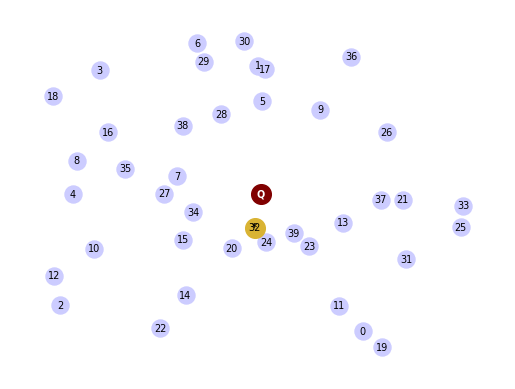

In [7]:
# Use nearest_neigbor to find the best vector embedding for our search
(G_lin, G_best) = nearest_neigbor(vec_pos,query_vec)

# plot it on the graph
pos_lin=nx.get_node_attributes(G_lin,'pos')
pos_best=nx.get_node_attributes(G_best,'pos')

fig, axs = plt.subplots()

nx.draw(G_lin, pos_lin, with_labels=True, node_size=150, node_color=[[0.8,0.8,1]], width=0.0, font_size=7, ax = axs)
nx.draw(G_query, pos_query, with_labels=True, node_size=200, node_color=[[0.5,0,0]], font_color='white', width=0.5, font_size=7, font_weight='bold', ax = axs)
nx.draw(G_best, pos_best, with_labels=True, node_size=200, node_color=[[0.85,0.7,0.2]], width=0.5, font_size=7, font_weight='bold', ax = axs)

### HNSW Construction
HNSW is a very popular technology for vector similarity search. Produces a performance with super fast search and fantastic recall

layer_i =  3


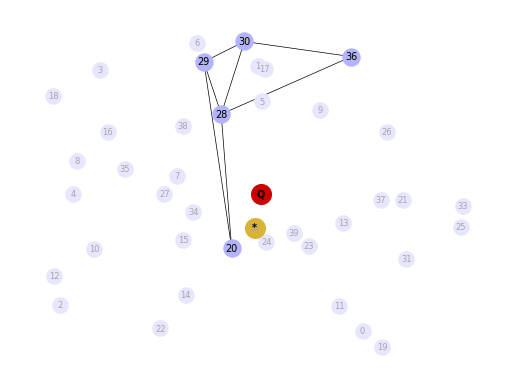

layer_i =  2


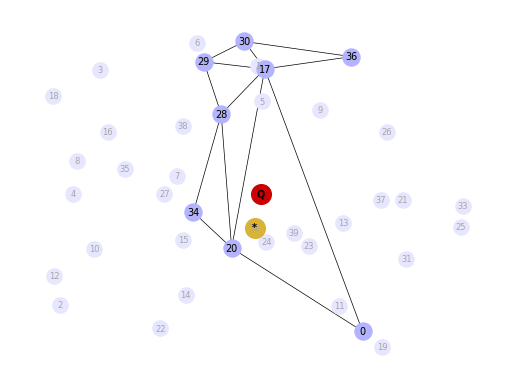

layer_i =  1


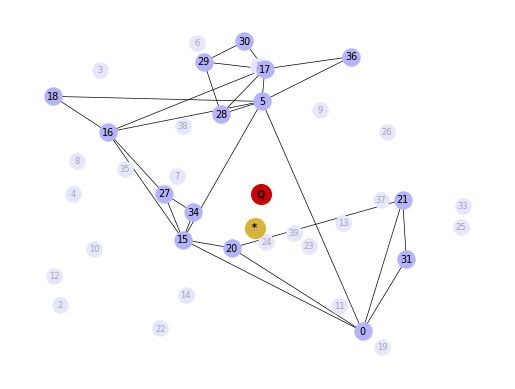

layer_i =  0


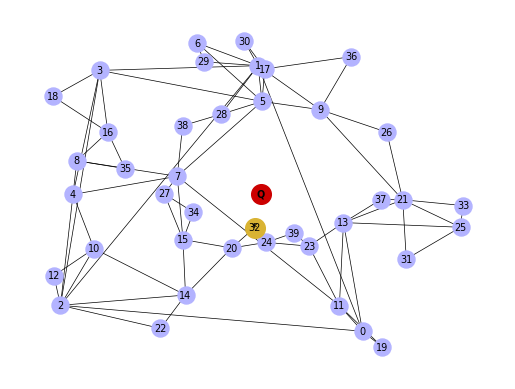

In [8]:
GraphArray = construct_HNSW(vec_pos,m_nearest_neighbor)

for layer_i in range(len(GraphArray)-1,-1,-1):
    fig, axs = plt.subplots()

    print("layer_i = ", layer_i)
        
    if layer_i>0:
        pos_layer_0 = nx.get_node_attributes(GraphArray[0],'pos')
        nx.draw(GraphArray[0], pos_layer_0, with_labels=True, node_size=120, node_color=[[0.9,0.9,1]], width=0.0, font_size=6, font_color=(0.65,0.65,0.65), ax = axs)

    pos_layer_i = nx.get_node_attributes(GraphArray[layer_i],'pos')
    nx.draw(GraphArray[layer_i], pos_layer_i, with_labels=True, node_size=150, node_color=[[0.7,0.7,1]], width=0.5, font_size=7, ax = axs)
    nx.draw(G_query, pos_query, with_labels=True, node_size=200, node_color=[[0.8,0,0]], width=0.5, font_size=7, font_weight='bold', ax = axs)
    nx.draw(G_best, pos_best, with_labels=True, node_size=200, node_color=[[0.85,0.7,0.2]], width=0.5, font_size=7, font_weight='bold', ax = axs)
    plt.show()

### HNSW Search

layer_i =  3


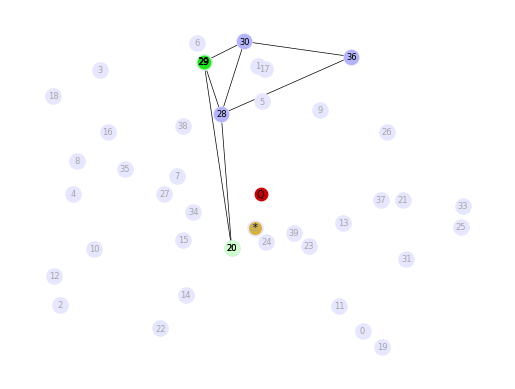

layer_i =  2


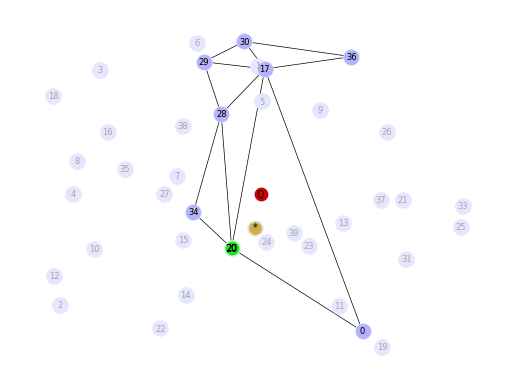

layer_i =  1


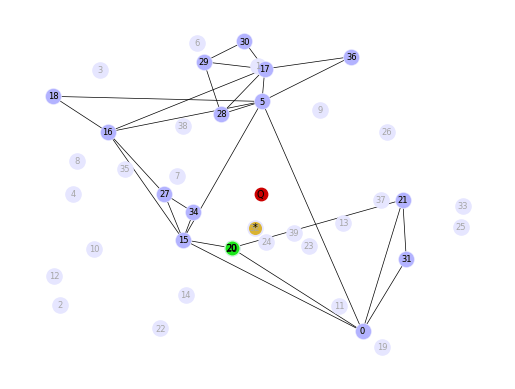

layer_i =  0


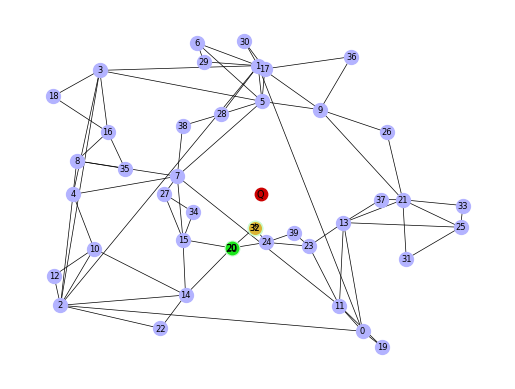

In [9]:
(SearchPathGraphArray, EntryGraphArray) = search_HNSW(GraphArray,G_query)

for layer_i in range(len(GraphArray)-1,-1,-1):
    fig, axs = plt.subplots()

    print("layer_i = ", layer_i)
    G_path_layer = SearchPathGraphArray[layer_i]
    pos_path = nx.get_node_attributes(G_path_layer,'pos')
    G_entry = EntryGraphArray[layer_i]
    pos_entry = nx.get_node_attributes(G_entry,'pos')

    if layer_i>0:
            pos_layer_0 = nx.get_node_attributes(GraphArray[0],'pos')
            nx.draw(GraphArray[0], pos_layer_0, with_labels=True, node_size=120, node_color=[[0.9,0.9,1]], width=0.0, font_size=6, font_color=(0.65,0.65,0.65), ax = axs)

    pos_layer_i = nx.get_node_attributes(GraphArray[layer_i],'pos')
    nx.draw(GraphArray[layer_i], pos_layer_i, with_labels=True, node_size=100, node_color=[[0.7,0.7,1]], width=0.5, font_size=6, ax = axs)
    nx.draw(G_path_layer, pos_path, with_labels=True, node_size=110, node_color=[[0.8,1,0.8]], width=0.5, font_size=6, ax = axs)
    nx.draw(G_query, pos_query, with_labels=True, node_size=80, node_color=[[0.8,0,0]], width=0.5, font_size=7, ax = axs)
    nx.draw(G_best, pos_best, with_labels=True, node_size=70, node_color=[[0.85,0.7,0.2]], width=0.5, font_size=7, ax = axs)
    nx.draw(G_entry, pos_entry, with_labels=True, node_size=80, node_color=[[0.1,0.9,0.1]], width=0.5, font_size=7, ax = axs)
    plt.show()

## Pure Vector Search - with a vector database

In [12]:
!pip install -U weaviate-client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.7/293.7 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.7/223.7 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 60.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 27.9 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.51.1
    Uninstalling grpcio-1.51.1:
      Successfully uninstalled grpcio-1.51.1
  Attempting uninstall: httpx
    Found existing installation: httpx 0.25.2
    Uninstalling httpx-0.25.2:
      Successfully uninstalled httpx-0.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
astrapy 0.7.1 requires httpx[http2]<0.26.0,>=0.25.1, but you have httpx 0.26.0 which is incompatible.
tens

In [10]:
import weaviate, json
from weaviate import EmbeddedOptions

client = weaviate.Client(
    embedded_options=EmbeddedOptions(),
)

client.is_ready()

/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/weaviate/__init__.py:128: DeprecationWarning: Dep010: Importing EmbeddedOptions from weaviate is deprecated. Please import it from its specific module: weaviate.embedded
  _Warnings.root_module_import(name, map_[name])
/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/weaviate/warnings.py:158: DeprecationWarning: Dep016: You are using the Weaviate v3 client, which is deprecated.
            Consider upgrading to the new and improved v4 client instead!
            See here for usage: https://weaviate.io/developers/weaviate/client-libraries/python
            
  warnings.warn(


Started /Users/n.c.rodriguez/.cache/weaviate-embedded: process ID 11503


{"action":"startup","default_vectorizer_module":"none","level":"info","msg":"the default vectorizer modules is set to \"none\", as a result all new schema classes without an explicit vectorizer setting, will use this vectorizer","time":"2024-02-16T08:54:58+01:00"}
{"action":"startup","auto_schema_enabled":true,"level":"info","msg":"auto schema enabled setting is set to \"true\"","time":"2024-02-16T08:54:58+01:00"}
{"level":"info","msg":"No resource limits set, weaviate will use all available memory and CPU. To limit resources, set LIMIT_RESOURCES=true","time":"2024-02-16T08:54:58+01:00"}
{"level":"warning","msg":"Multiple vector spaces are present, GraphQL Explore and REST API list objects endpoint module include params has been disabled as a result.","time":"2024-02-16T08:54:58+01:00"}
{"action":"grpc_startup","level":"info","msg":"grpc server listening at [::]:50060","time":"2024-02-16T08:54:58+01:00"}
{"action":"restapi_management","level":"info","msg":"Serving weaviate at http://12

True

In [11]:
# resetting the schema. CAUTION: This will delete your collection 
# if client.schema.exists("MyCollection"):
#     client.schema.delete_class("MyCollection")

schema = {
    "class": "MyCollection",
    "vectorizer": "none",
    "vectorIndexConfig": {
        "distance": "cosine" # let's use cosine distance
    },
}

client.schema.create_class(schema)

print("Successfully created the schema.")

Successfully created the schema.


{"level":"info","msg":"Created shard mycollection_F3hp1WHKtpxB in 13.57375ms","time":"2024-02-16T08:55:00+01:00"}
{"action":"hnsw_vector_cache_prefill","count":1000,"index_id":"main","level":"info","limit":1000000000000,"msg":"prefilled vector cache","time":"2024-02-16T08:55:00+01:00","took":92375}


### Import the Data

In [12]:
data = [
   {
      "title": "First Object",
      "foo": 99, 
      "vector": [0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
   },
   {
      "title": "Second Object",
      "foo": 77, 
      "vector": [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
   },
   {
      "title": "Third Object",
      "foo": 55, 
      "vector": [0.3, 0.1, -0.1, -0.3, -0.5, -0.7]
   },
   {
      "title": "Fourth Object",
      "foo": 33, 
      "vector": [0.4, 0.41, 0.42, 0.43, 0.44, 0.45]
   },
   {
      "title": "Fifth Object",
      "foo": 11,
      "vector": [0.5, 0.5, 0, 0, 0, 0]
   },
]

In [13]:
# En este código se usa Weaviate para realiazr una importación por lotes de objetos de datos en un servicio Weaiate.

client.batch.configure(batch_size=10)  # Configure batch. En cada solicitud de importación, se enviarán 10 objetos

# Batch import all objects
# yes batch is an overkill for 5 objects, but it is recommended for large volumes of data
with client.batch as batch:
  for item in data:

      properties = {
         "title": item["title"],
         "foo": item["foo"],
      }

      # the call that performs data insert
      client.batch.add_data_object(
         class_name="MyCollection",
         data_object=properties,
         vector=item["vector"] # your vector embeddings go here
      )

In [14]:
# Check number of objects
response = (
    client.query
    .aggregate("MyCollection")
    .with_meta_count()
    .do()
)

print(response)

{'data': {'Aggregate': {'MyCollection': [{'meta': {'count': 5}}]}}}


En el output anterior se puede observar como la colección 'MyCollection' dentro de la bbdd tiene 5 objetos

### Query Weaviate: Vector Search (vector embeddings)

In [15]:
response = (
    client.query
    .get("MyCollection", ["title"]) #para recuperar los títulos de los objetos dentro de la colleción 'MyCollection'
    .with_near_vector({
        "vector": [-0.012, 0.021, -0.23, -0.42, 0.5, 0.5]
    }) #búsqueda de vectores similares al vector dado
    .with_limit(2) # limit the output to only 2
    .do()
)

result = response["data"]["Get"]["MyCollection"]
print(json.dumps(result, indent=2))

[
  {
    "title": "Second Object"
  },
  {
    "title": "Fourth Object"
  }
]


In [16]:
# Lo mismo que antes pero ahora recuperamos más información, como la distancia, el vector y el id
response = (
    client.query
    .get("MyCollection", ["title"])
    .with_near_vector({
        "vector": [-0.012, 0.021, -0.23, -0.42, 0.5, 0.5]
    })
    .with_limit(2) # limit the output to only 2
    .with_additional(["distance", "vector, id"])
    .do()
)

result = response["data"]["Get"]["MyCollection"]
print(json.dumps(result, indent=2))

[
  {
    "_additional": {
      "distance": 0.6506307,
      "id": "f0a2e3af-5576-436e-8a0b-9e64f7560dcd",
      "vector": [
        0.2,
        0.3,
        0.4,
        0.5,
        0.6,
        0.7
      ]
    },
    "title": "Second Object"
  },
  {
    "_additional": {
      "distance": 0.8072029,
      "id": "57465c64-b964-4d83-a250-1103e5d2863d",
      "vector": [
        0.4,
        0.41,
        0.42,
        0.43,
        0.44,
        0.45
      ]
    },
    "title": "Fourth Object"
  }
]


### Vector Search with filters

In [17]:
response = (
    client.query
    .get("MyCollection", ["title", "foo"])
    .with_near_vector({
        "vector": [-0.012, 0.021, -0.23, -0.42, 0.5, 0.5]
    })
    .with_additional(["distance, id"]) # output the distance of the query vector to the objects in the database
    .with_where({
        "path": ["foo"],
        "operator": "GreaterThan",
        "valueNumber": 44
    })
    .with_limit(2) # limit the output to only 2
    .do()
)

result = response["data"]["Get"]["MyCollection"]
print(json.dumps(result, indent=2))

[
  {
    "_additional": {
      "distance": 0.6506307,
      "id": "f0a2e3af-5576-436e-8a0b-9e64f7560dcd"
    },
    "foo": 77,
    "title": "Second Object"
  },
  {
    "_additional": {
      "distance": 0.8284496,
      "id": "d0ddb18f-aa78-4198-a468-8365c25ad933"
    },
    "foo": 99,
    "title": "First Object"
  }
]


### nearObject Example

In [18]:
# Búsqueda de los 3 objetos más cercanos de la búsqueda anterior (guardada en result)
response = (
    client.query
    .get("MyCollection", ["title"])
    .with_near_object({ # the id of the the search object
        "id": result[0]['_additional']['id']
    })
    .with_limit(3)
    .with_additional(["distance"])
    .do()
)

result = response["data"]["Get"]["MyCollection"]
print(json.dumps(result, indent=2))

[
  {
    "_additional": {
      "distance": 0
    },
    "title": "Second Object"
  },
  {
    "_additional": {
      "distance": 0.051573634
    },
    "title": "Fourth Object"
  },
  {
    "_additional": {
      "distance": 0.06506646
    },
    "title": "First Object"
  }
]
